#### Contexte du projet

*Description rapide des utilisateurs, de la problématique, de l'état de l'art et des besoins.*

**Le maintien et le développement des commerces de centre-ville ou de proximité** est un objectif recherché par de nombreuses collectivités et acteurs publics. En effet, ces commerces, dont la catégorisation n’est pas évidente, sont au croisement de plusieurs dimensions politiques. Ils questionnent d’abord **nos rapports à la consommation**. Dans un contexte dans lequel la part de nos achats en ligne explose, ces commerces peuvent représenter une alternative et favoriser la consommation locale. Les commerces sont également **au centre des politiques d’aménagement de nos villes** : revitalisation des centres-villes, développement de [la ville du quart d’heure](https://fr.wikipedia.org/wiki/Ville_du_quart_d%27heure), etc.

Au-delà du développement économique, l’activité des commerces de proximité contribue à **donner une âme aux territoires** : ils animent le quartier, créent du lien entre les habitants, contribuent à l'entretien de la ville, rendent le territoire plus sûr, etc. Ces dimensions, que l’on peut qualifier d’externalités positives, sont par définition cachées et les collectivités disposent de peu (voir pas) de données pour les quantifier.

**La problématique**

Ce projet vous propose ainsi de répondre aux questions suivantes :
* **Quelle est la structure du tissu commercial d’une ville (au choix), en son centre et à ses périphéries ?**
* **Comment piloter efficacement les politiques de soutien aux commerces de proximité ?**

💡 Pour ce défi, il est peut être intéressant de prendre des territoires qui se situent dans le programme [Action Cœur de Ville](https://www.banquedesterritoires.fr/action-coeur-de-ville-revitalisation-centres-villes) porté par l’ANCT et la Banque des Territoires. La revitalisation commerciale est au centre de deux des trois axes de ce programme :
1. Développement économique et commercial équilibré
2. Accès aux équipements et aux services publics.

# Exemple : départements et fast-foods

In [1]:
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile
import plotly.express as px

In [2]:
# le fichier .zip contient 3 fichiers différents, dont le .csv qui nous intéresse 
content = requests.get('https://geodatamine.fr/dump/shop_craft_office_csv.zip').content
the_zip = ZipFile(BytesIO(content))

In [3]:
df = pd.read_csv(the_zip.open('data.csv'), sep=';')
df

,X,Y,osm_id,type,name,brand,operator,wheelchair,opening_hours,level,...,profession_ref,wikidata,website,phone,email,facebook,address,com_insee,com_nom,last_update
0,0.042976,43.600642,node/1306267852,laundry,NaN,NaN,NaN,no,24/7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32319,Plaisance,2017-12-01
1,4.951489,48.614034,node/11353938479,supermarket,Bois l'Abesse Saint Dizier,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52448,Saint-Dizier,2023-11-16
2,2.898969,42.691713,node/10086759651,educational_institution,CRAF,NaN,ADPEP 66,NaN,NaN,NaN,...,NaN,NaN,http://www.adpep66.org/poles/formation-conseil/,04 68 34 76 81,NaN,NaN,NaN,66136,Perpignan,2022-10-09
3,55.468992,-21.285620,node/3090292703,shoes,La Bonne Pointure,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97416,Saint-Pierre,2014-09-22
4,4.389882,44.618075,node/819817568,travel_agency,Ailleurs Voyages,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07019,Aubenas,2019-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637416,-3.075557,47.573392,node/6023216120,restaurant,La Poêle à Crêpes,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56034,Carnac,2022-09-02
637417,-1.719222,47.224660,node/11685829904,cheese,La Tome de Couëron,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44047,Couëron,2024-03-02
637418,0.146254,47.972724,way/63576659,clothes,Stock House,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72003,Allonnes,2011-06-09
637419,-2.893540,47.550053,node/9219228198,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56005,Arzon,2021-11-02


In [7]:
# les 20 types de commerces les plus représentés
shop_types = df['type'].value_counts().index[:20]
print(shop_types)
chosen_type = 'fast_food'

Index(['restaurant', 'clothes', 'bakery', 'hairdresser', 'fast_food',
       'pharmacy', 'bank', 'bar', 'convenience', 'post_office', 'supermarket',
       'estate_agent', 'car_repair', 'cafe', 'fuel', 'butcher', 'beauty',
       'optician', 'car', 'insurance'],
      dtype='object')


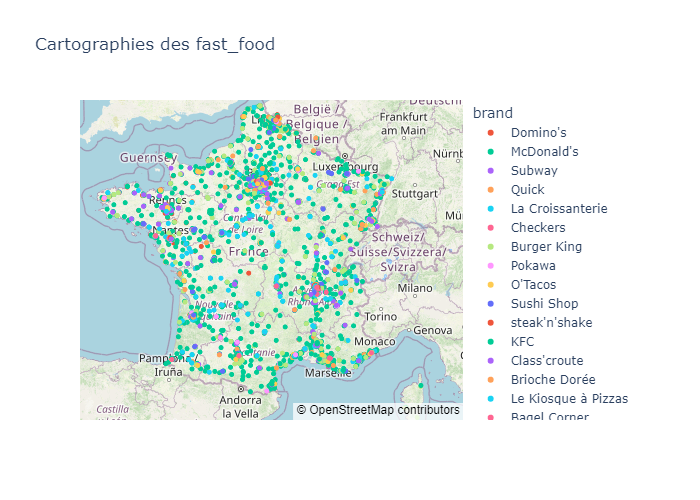

In [53]:
fig = px.scatter_mapbox(
    df.loc[df['type'] == chosen_type],
    lat="Y",
    lon="X",
    color="brand",
    hover_name="name",
    title=f"Cartographies des {chosen_type}",
    mapbox_style="open-street-map",
    zoom=4,
    center={"lat": 46.573134, "lon": 2.874663}
)
# le paramètre renderer permet de garder l'image après fermeture du notebook mais il n'est plus interactible
fig.show(
#     renderer='png'
)

In [8]:
# on va chercher le nmbre d'habitants par département selon INSEE
# le fichier excel n'est pas très agréable à manipuler, en règle générale on préfère le csv
insee_pop = pd.read_excel(
    'https://www.insee.fr/fr/statistiques/fichier/2012692/TCRD_021.xlsx',
    # le fichier "commence" à la 3e ligne, 2e colonne
    header=3,
    index_col=1,
)
insee_pop.rename(
    {'Unnamed: 0': 'code_departement', 'Ensemble': 'population_2024'},
    axis=1,
    inplace=True,
)
insee_pop = insee_pop[['code_departement', 'population_2024']].reset_index().dropna(subset='population_2024')
insee_pop

,index,code_departement,population_2024
0,Ain,01,679498.0
1,Aisne,02,521632.0
2,Allier,03,332708.0
3,Alpes-de-Haute-Provence,04,168161.0
4,Hautes-Alpes,05,141661.0
...,...,...,...
99,Martinique,972,349925.0
100,Guyane,973,295385.0
101,La Réunion,974,885700.0
102,Mayotte,976,320901.0


In [14]:
# on calcule le nombre de fast-foods par département
restr = df.loc[df['type'] == chosen_type]
restr['code_departement'] = restr['com_insee'].str.slice(0, 2)
restr = restr['code_departement'].value_counts().reset_index()
restr.rename(
    {'index': 'code_departement', 'code_departement': f'nb_{chosen_type}'},
    axis=1,
    inplace=True,
)
restr

C:\Users\Dinum\AppData\Local\Temp\ipykernel_6768\502325547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restr['code_departement'] = restr['com_insee'].str.slice(0, 2)


,code_departement,nb_fast_food
0,75,2569
1,59,1072
2,97,990
3,69,852
4,13,842
...,...,...
93,15,45
94,36,33
95,32,29
96,48,24


In [15]:
stats = pd.merge(
    restr,
    insee_pop,
    on='code_departement',
    how='left',
)
stats[f'{chosen_type}_pour_1000_hab'] = stats[f'nb_{chosen_type}'] / stats['population_2024'] * 1000
stats = (
    stats.sort_values(f'{chosen_type}_pour_1000_hab', ascending=False)
    .dropna(subset=f'{chosen_type}_pour_1000_hab')
    .reset_index(drop=True)
)
stats

,code_departement,nb_fast_food,index,population_2024,fast_food_pour_1000_hab
0,75,2569,Paris,2087577.0,1.230613
1,05,104,Hautes-Alpes,141661.0,0.734147
2,04,103,Alpes-de-Haute-Provence,168161.0,0.612508
3,84,342,Vaucluse,568715.0,0.601356
4,40,252,Landes,434933.0,0.579400
...,...,...,...,...,...
91,23,23,Creuse,113922.0,0.201893
92,02,92,Aisne,521632.0,0.176370
93,16,60,Charente,349856.0,0.171499
94,36,33,Indre,213871.0,0.154299


In [18]:
# top 5
for idx, row in stats.iterrows():
    if idx > 5:
        break
    print(
        f"Le département {row['index']} ({row['code_departement']}) "
        f"a {round(row[f'{chosen_type}_pour_1000_hab'], 3)} {chosen_type} pour 1000 habitants"
    )

Le département Paris (75) a 1.231 fast_food pour 1000 habitants
Le département Hautes-Alpes (05) a 0.734 fast_food pour 1000 habitants
Le département Alpes-de-Haute-Provence (04) a 0.613 fast_food pour 1000 habitants
Le département Vaucluse (84) a 0.601 fast_food pour 1000 habitants
Le département Landes (40) a 0.579 fast_food pour 1000 habitants
Le département Territoire de Belfort (90) a 0.554 fast_food pour 1000 habitants
